<a href="https://colab.research.google.com/github/Evans-16/nazzy/blob/main/eyediseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16
from numpy import argmax

In [ ]:
PATH = "/content/drive/MyDrive/eyediseases/Training"
data_dir_list = os.listdir(PATH)
data_dir_list

['Glaucoma', 'Cataracts', 'Uveitis', 'Crossed_Eyes', 'Bulging_eyes']

In [ ]:
img_rows=224
img_cols=224
num_channel=3

num_epoch = 50
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(PATH +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from Glaucoma folder
Getting image from Cataracts folder
Getting image from Uveitis folder
Getting image from Crossed_Eyes folder
Getting image from Bulging_eyes folder


In [ ]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

num_classes 5
Shape of image data (307, 224, 224, 3)


In [ ]:
num_of_samples

307

In [ ]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3, 4])

In [ ]:
target_column

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define your model
first_Mod = Sequential([
    Flatten(input_shape=(input_shape)),  # Assuming input_shape is defined elsewhere
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
first_Mod.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
first_Mod.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 19268357 (73.50 MB)
Trainable params: 19268357 (73.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = first_Mod.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = first_Mod.evaluate(X_test,y_test,batch_size=batch_size)

Epoch 1/50
7/7 [==============================] - 2s 70ms/step - loss: 140.1860 - accuracy: 0.2804 - val_loss: 210.2428 - val_accuracy: 0.1077
Epoch 2/50
7/7 [==============================] - 0s 25ms/step - loss: 108.9487 - accuracy: 0.2570 - val_loss: 39.4499 - val_accuracy: 0.0462
Epoch 3/50
7/7 [==============================] - 0s 25ms/step - loss: 42.1834 - accuracy: 0.3318 - val_loss: 35.3050 - val_accuracy: 0.2923
Epoch 4/50
7/7 [==============================] - 0s 32ms/step - loss: 30.3948 - accuracy: 0.3271 - val_loss: 22.1141 - val_accuracy: 0.2308
Epoch 5/50
7/7 [==============================] - 0s 31ms/step - loss: 17.1207 - accuracy: 0.4579 - val_loss: 24.4054 - val_accuracy: 0.3231
Epoch 6/50
7/7 [==============================] - 0s 24ms/step - loss: 11.2315 - accuracy: 0.4720 - val_loss: 12.1383 - val_accuracy: 0.2923
Epoch 7/50
7/7 [==============================] - 0s 29ms/step - loss: 9.5379 - accuracy: 0.4626 - val_loss: 22.8846 - val_accuracy: 0.4000
Epoch 8/50


In [ ]:
print("Loss of the model is - " , first_Mod.evaluate(X_temp,y_temp)[0])
print("Accuracy of the model is - " , first_Mod.evaluate(X_temp,y_temp)[1]*100 , "%")

3/3 [==============================] - 0s 12ms/step - loss: 12.2171 - accuracy: 0.4086
Loss of the model is -  12.217059135437012
3/3 [==============================] - 0s 12ms/step - loss: 12.2171 - accuracy: 0.4086
Accuracy of the model is -  40.860214829444885 %


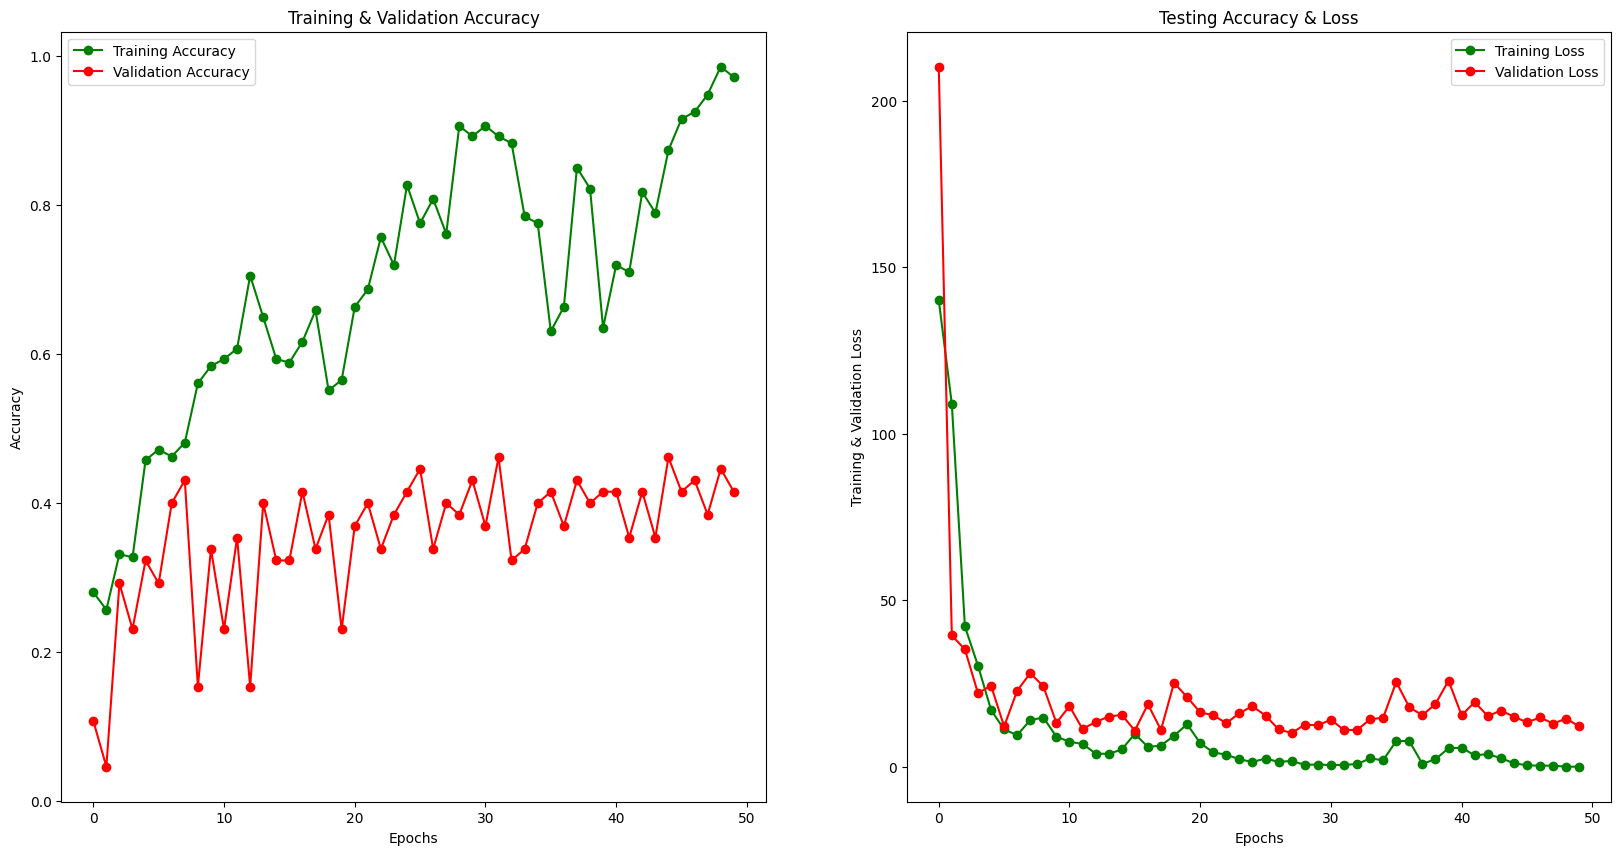

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = first_Mod.predict(X_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

3/3 [==============================] - 0s 6ms/step


array([9.9993515e-01, 1.1328762e-15, 8.5306340e-07, 6.3990716e-05,
       5.8948748e-09, 7.1376611e-08, 3.2133671e-09, 9.9999988e-01,
       1.2257915e-22, 6.4607683e-17, 6.1652210e-02, 1.9890564e-02,
       9.0299845e-01, 1.5458848e-02, 2.6230756e-10], dtype=float32)

In [ ]:
from shutil import copy
from tensorflow.keras.models import save_model

# Save the model in native Keras format
save_model(first_Mod, 'eyedisease.keras')
copy('eyedisease.keras', '/content/drive/MyDrive/model')


'/content/drive/MyDrive/model/eyedisease.keras'